In [1]:
import numpy as np
import pandas as pd
from asl_data import AslDb

asl = AslDb()
asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker
video frame                                                           
98    0         149     181      170      175     161      62  woman-1
      1         149     181      170      175     161      62  woman-1
      2         149     181      170      175     161      62  woman-1
      3         149     181      170      175     161      62  woman-1
      4         149     181      170      175     161      62  woman-1

In [2]:
values = ['left-x','left-y','right-x','right-y','nose-x','nose-y']

In [3]:
for x in asl.df.columns:
    print(x)

left-x
left-y
right-x
right-y
nose-x
nose-y
speaker


In [4]:
from sklearn import preprocessing

for item in values:
    print('Mean, StDev Before standardization:\n{}={:.2f},{:.2f}'
      .format(item, asl.df[[item]].mean().mean(), asl.df[[item]].std().mean()))

Mean, StDev Before standardization:
left-x=187.57,23.69
Mean, StDev Before standardization:
left-y=189.95,40.53
Mean, StDev Before standardization:
right-x=154.57,17.29
Mean, StDev Before standardization:
right-y=132.05,48.20
Mean, StDev Before standardization:
nose-x=170.08,7.33
Mean, StDev Before standardization:
nose-y=59.33,4.89


In [5]:
from sklearn import preprocessing

for item in values:
    std_scale = preprocessing.StandardScaler().fit(asl.df[[item]])
    df_std = std_scale.transform(asl.df[[item]])
    asl.df[item+'_std']=df_std
    print('Mean, StDev after standardization:\n{}={:.2f},{:.2f}'
      .format(item, df_std.mean(), df_std.std()))

Mean, StDev after standardization:
left-x=0.00,1.00
Mean, StDev after standardization:
left-y=-0.00,1.00
Mean, StDev after standardization:
right-x=0.00,1.00
Mean, StDev after standardization:
right-y=0.00,1.00
Mean, StDev after standardization:
nose-x=-0.00,1.00
Mean, StDev after standardization:
nose-y=-0.00,1.00


In [6]:
asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             left-x_std  left-y_std  right-x_std  right-y_std  nose-x_std  \
video frame                                                                 
98    0       -1.628491   -0.220854     0.892503     0.891048    -1.23941   
      1       -1.628491   -0.220854     0.892503     0.891048    -1.23941   
      2       -1.628491   -0.220854     0.892503     0.891048    -1.23941   
      3       -1.628491   -0.220854     0.892503     0.891048    -1.23941   
      4       -1.628491   -0.220854     0.892503     0.891048    -1.23941   

             nose-y_std  
video frame              
98    0        0.545945  
      1        0.545945  
      2        0.545945  
      3        0.545945  
      4        0.545945

In [7]:
from sklearn import preprocessing

for item in values:
    minmax_scale = preprocessing.MinMaxScaler().fit(asl.df[[item]])
    df_minmax = minmax_scale.transform(asl.df[[item]])
    asl.df[item+'_mmax']=df_minmax
    print('Min, Max after standardization:\n{}={:.2f},{:.2f}'
      .format(item, df_minmax.min(), df_minmax.max()))

Min, Max after standardization:
left-x=0.00,1.00
Min, Max after standardization:
left-y=0.00,1.00
Min, Max after standardization:
right-x=0.00,1.00
Min, Max after standardization:
right-y=0.00,1.00
Min, Max after standardization:
nose-x=0.00,1.00
Min, Max after standardization:
nose-y=0.00,1.00


In [8]:
%matplotlib inline

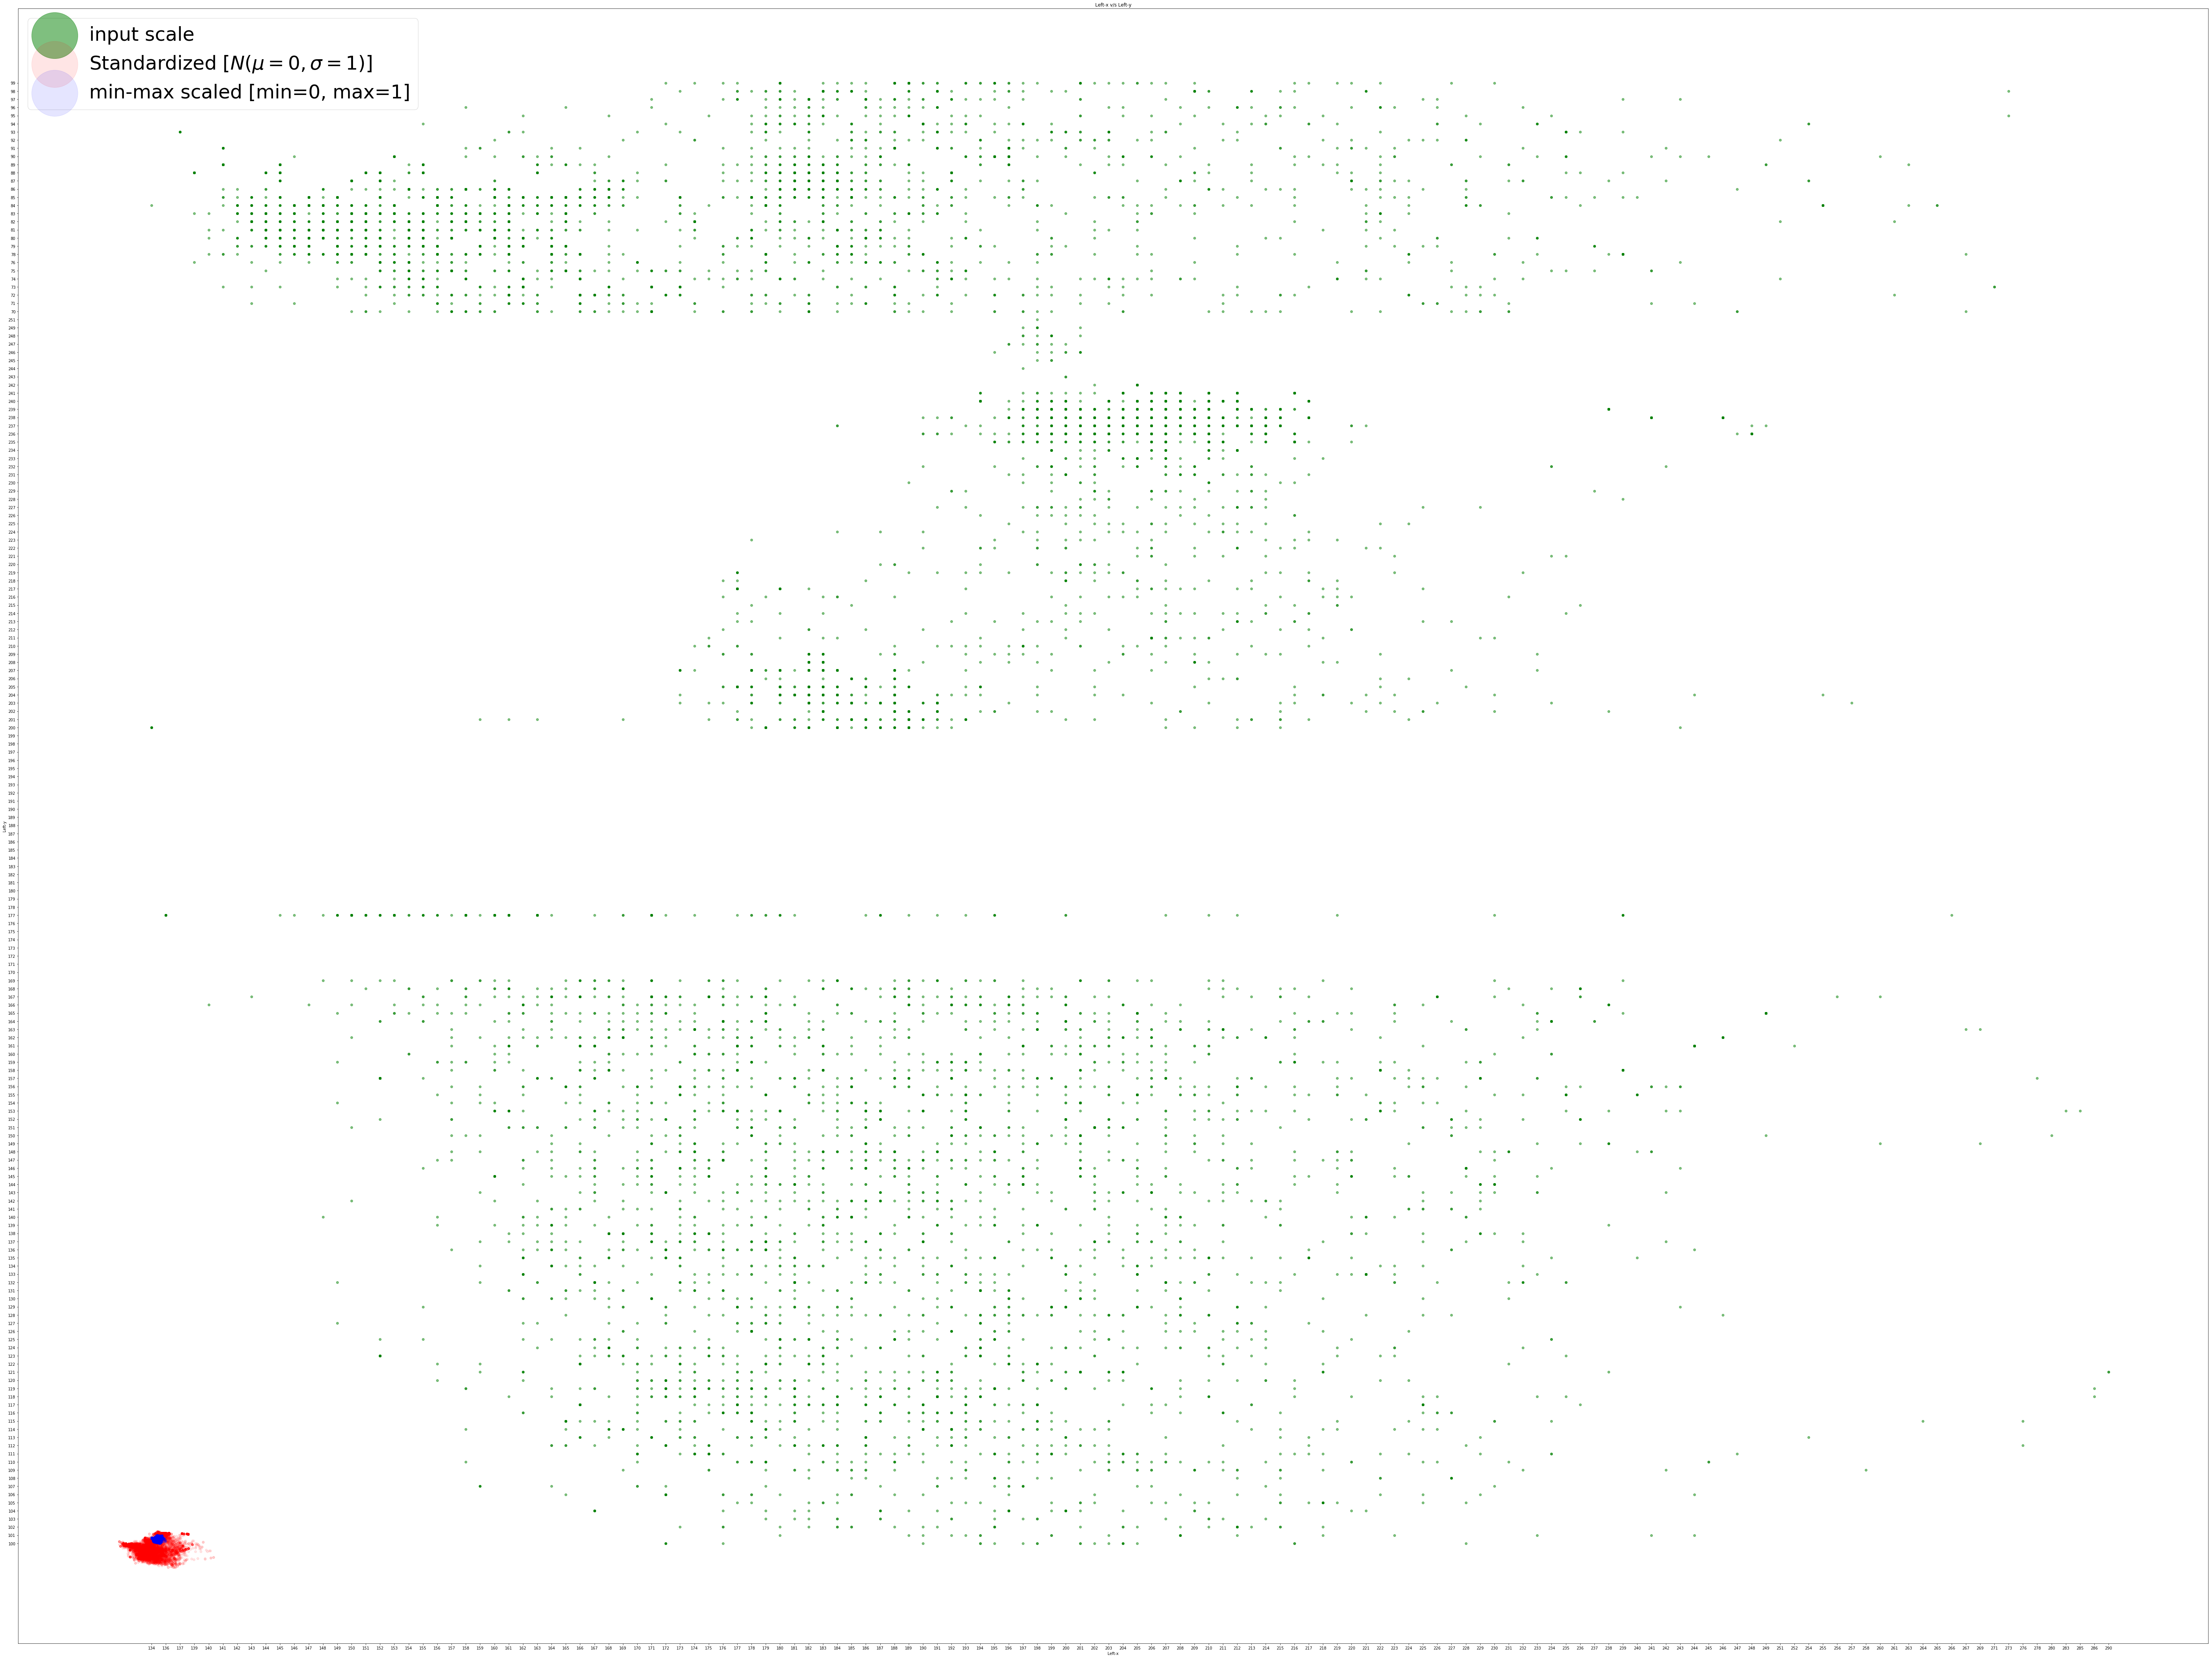

In [9]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(80,60))

    plt.scatter(asl.df[['left-x']], asl.df[['left-y']],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(asl.df[['left-x_std']], asl.df[['left-y_std']], color='red',
            label='Standardized [$N  (\mu=0,\sigma=1)$]', alpha=0.1)

    plt.scatter(asl.df[['left-x_mmax']], asl.df[['left-y_mmax']],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.1)

    plt.title('Left-x v/s Left-y')
    plt.xlabel('Left-x')
    plt.ylabel('Left-y')
    plt.legend(loc='upper left',fontsize=50, markerscale=20.)
    plt.tight_layout()

plot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001976C0846D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001976C7B6710>]], dtype=object)

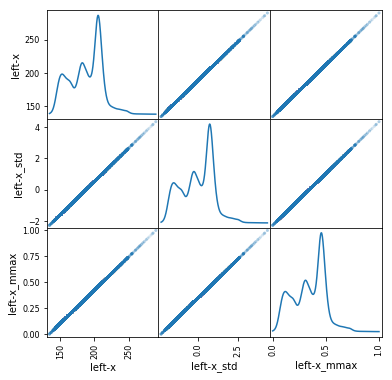

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(asl.df[['left-x', 'left-x_std', 'left-x_mmax']], alpha =0.2,
              figsize=(6,6), diagonal='kde')

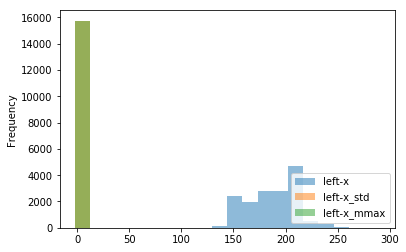

In [11]:
plt.figure();
asl.df[['left-x', 'left-x_std', 'left-x_mmax']].plot.hist(alpha=0.5, bins=20)
plt.legend(loc='lower right')

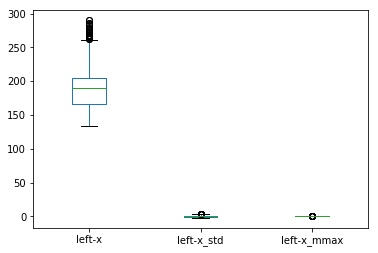

In [12]:
plt.figure();
asl.df[['left-x', 'left-x_std', 'left-x_mmax']].plot.box()

**Need to minmaxscale** 